# Pandas Basics Portfolio
This notebook explores core pandas functionality with theoretical notes and practical code examples.

## DataFrame Creation and CSV I/O
Load the portfolio CSVs into pandas DataFrames.

In [1]:
import pandas as pd
customers = pd.read_csv('data/customers.csv')
orders = pd.read_csv('data/orders.csv')
products = pd.read_csv('data/products.csv')
orders_raw = orders.copy()
products.head()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/alamanna1/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/alamanna1/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/alamanna1/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/alamanna1/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/alamanna1/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/alamanna1/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/alamanna1/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/alamanna1/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages

AttributeError: _ARRAY_API not found

,product_id,product_name,category,price
0,1,Product1,D,37.70
1,2,Product2,C,32.82
2,3,Product3,A,48.57
3,4,Product4,D,41.27
4,5,Product5,A,36.23


In [16]:
len(products)

100

## Column and Row Selection
Use indexing, `.loc`, `.iloc`, and boolean masks to select data.

In [2]:
# Select columns
name_city = customers[['name','city']]
# Boolean filter and reset_index
houston_customers = customers[customers['city']== 'Houston'].reset_index(drop=True)
# Position-based row slice
first_three = orders.iloc[:3]
first_three

,order_id,customer_id,product_id,quantity,order_date
0,1,33,25,5,2023-01-02
1,2,1,15,2,2023-01-03
2,3,69,63,4,2023-01-04


## Add/Transform Columns and Apply
Create new columns and apply functions column-wise and row-wise.

In [3]:
# Column-wise with vectorized operations
products['price_eur'] = products['price'] * 0.92
# Row-wise apply to compute total price per order
orders = orders.merge(products[['product_id','price','category']], on='product_id', how='left')
orders['total_price'] = orders.apply(lambda r: r['quantity'] * r['price'], axis=1)
orders.head()

,order_id,customer_id,product_id,quantity,order_date,price,category,total_price
0,1,33,25,5,2023-01-02,24.94,D,124.70
1,2,1,15,2,2023-01-03,16.95,B,33.90
2,3,69,63,4,2023-01-04,97.41,D,389.64
3,4,7,43,2,2023-01-05,95.64,D,191.28
4,5,47,10,1,2023-01-06,63.83,A,63.83


## Renaming and GroupBy
Rename columns and aggregate data, including custom percentiles.

In [4]:
orders_renamed = orders.rename(columns={'quantity':'qty'})
price_pct = products.groupby('category')['price'].agg(mean='mean', median='median', pct90=lambda x: x.quantile(0.9))
price_pct

,mean,median,pct90
category,,,
A,47.006522,44.70,71.982
B,41.971000,40.67,76.969
C,51.158378,47.86,86.902
D,57.616500,57.79,95.817


## Multi-key GroupBy and Pivot Tables
Group by multiple keys and reshape data with pivot tables.

In [5]:
multi = orders.groupby(['customer_id','product_id'])['quantity'].sum()
pivot = orders.pivot_table(values='quantity', index='customer_id', columns='product_id', fill_value=0)
pivot.iloc[:5, :5]

product_id,1,3,4,6,7
customer_id,,,,,
1,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0


## Merging and Concatenation
Combine DataFrames using various join strategies and concatenation.

In [6]:
inner = pd.merge(customers, orders_raw, on='customer_id', how='inner')
left = pd.merge(customers, orders_raw, on='customer_id', how='left')
right = pd.merge(customers, orders_raw, on='customer_id', how='right')
outer = pd.merge(customers, orders_raw, on='customer_id', how='outer')
prod_renamed = products.rename(columns={'product_id':'id'})
custom_merge = pd.merge(orders_raw, prod_renamed, left_on='product_id', right_on='id', how='inner', suffixes=('_order','_prod'))
concat_orders = pd.concat([orders_raw.head(2), orders_raw.tail(2)], ignore_index=True)
concat_orders

,order_id,customer_id,product_id,quantity,order_date
0,1,33,25,5,2023-01-02
1,2,1,15,2,2023-01-03
2,99,95,26,1,2023-04-10
3,100,45,100,3,2023-04-11


## Variable Types and Dtypes
Inspect and convert dtypes; treat numeric vs categorical data.

In [7]:
orders['order_id'] = orders['order_id'].astype('int64')
products['category'] = products['category'].astype('category')
orders.dtypes

order_id         int64
customer_id      int64
product_id       int64
quantity         int64
order_date      object
price          float64
category        object
total_price    float64
dtype: object

## Ordered Categoricals and One-Hot Encoding
Create ordered categoricals and dummy variables.

In [8]:
products['category'] = pd.Categorical(products['category'], categories=['A','B','C','D'], ordered=True)
category_dummies = pd.get_dummies(products['category'])
category_dummies.head()

,A,B,C,D
0,False,False,False,True
1,False,False,True,False
2,True,False,False,False
3,False,False,False,True
4,True,False,False,False


## Replace Usage
Standardize values with `replace`.

In [9]:
customers['city'] = customers['city'].replace({'New York':'NY','Los Angeles':'LA'})
customers.head()

,customer_id,name,city
0,1,Customer1,Phoenix
1,2,Customer2,LA
2,3,Customer3,Chicago
3,4,Customer4,LA
4,5,Customer5,Houston


## Data Summaries and Visualizations
Compute summary statistics and visualize distributions.

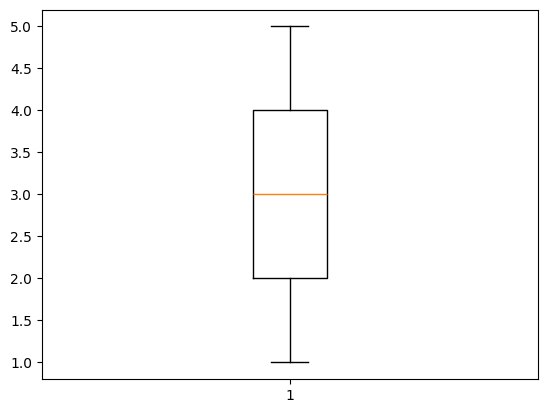

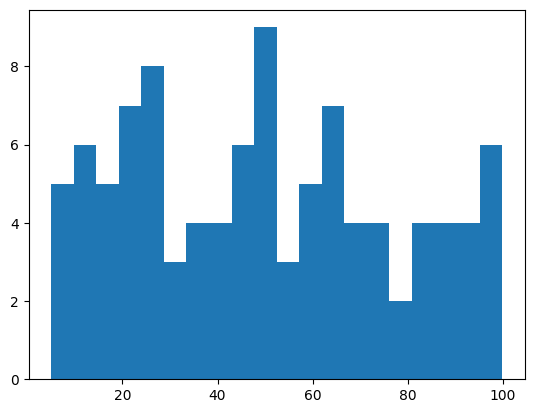

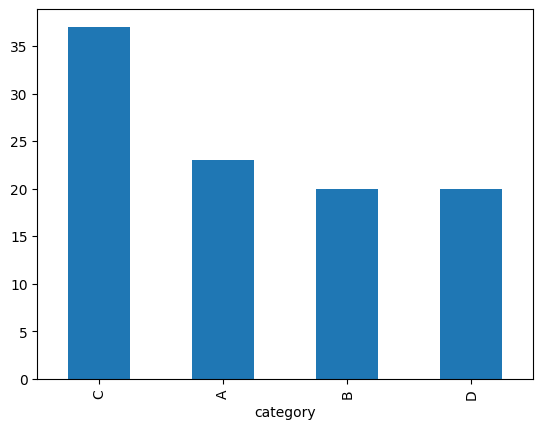

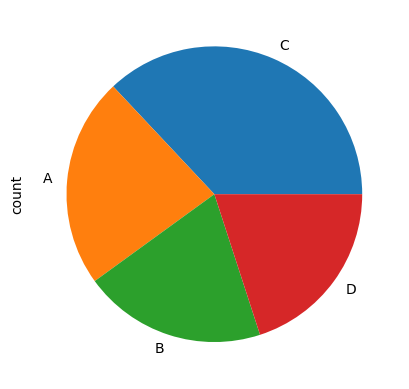

In [10]:
import matplotlib.pyplot as plt
orders['quantity'].describe()
plt.boxplot(orders['quantity'])
plt.show()
plt.hist(products['price'], bins=20)
plt.show()
products['category'].value_counts().plot(kind='bar')
plt.show()
products['category'].value_counts().plot(kind='pie')
plt.show()

## Value Counts and Proportions
Compute counts and proportions of categorical variables.

In [11]:
city_props = customers['city'].value_counts(normalize=True)
city_props

city
Chicago    0.22
NY         0.22
Houston    0.21
Phoenix    0.18
LA         0.17
Name: proportion, dtype: float64

## Associations
Explore relationships between variables.

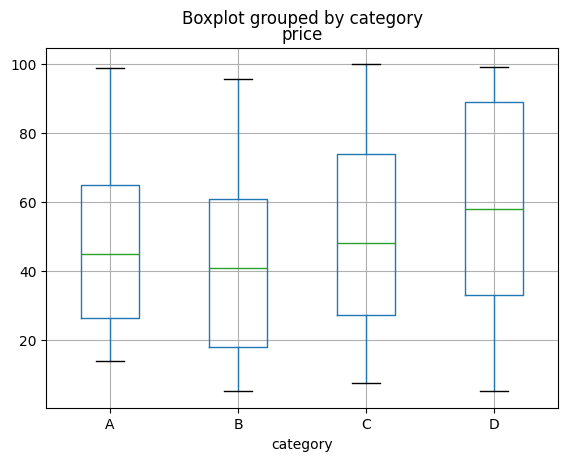

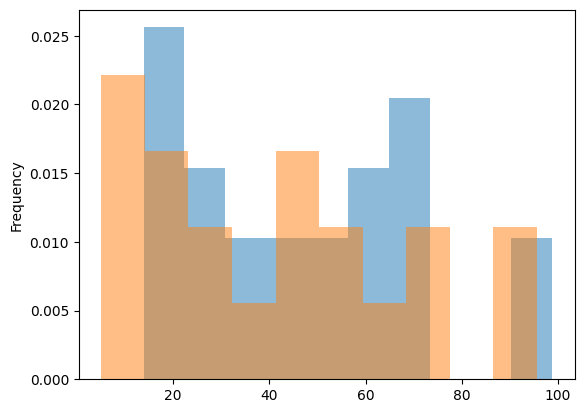

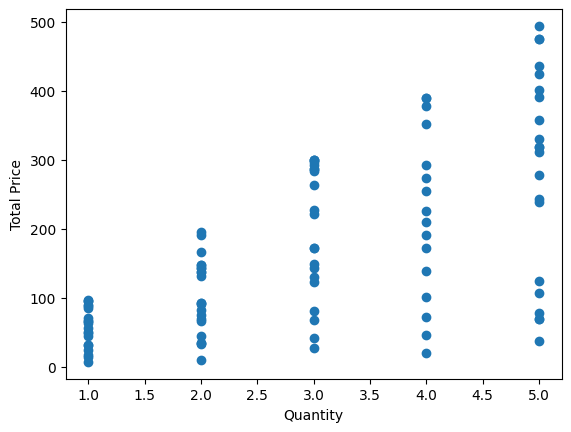

category,A,B,C,D
city,,,,
Chicago,5,3,12,4
Houston,7,7,4,0
LA,4,3,7,2
NY,4,3,8,9
Phoenix,1,2,9,6


In [12]:
# Quantitative vs Categorical
products.boxplot(column='price', by='category')
plt.show()
products[products['category']=='A']['price'].plot(kind='hist', density=True, alpha=0.5)
products[products['category']=='B']['price'].plot(kind='hist', density=True, alpha=0.5)
plt.show()
# Quantitative vs Quantitative
plt.scatter(orders['quantity'], orders['total_price'])
plt.xlabel('Quantity'); plt.ylabel('Total Price')
plt.show()
orders[['quantity','total_price']].cov()
from scipy import stats
pearson_r, p_val = stats.pearsonr(orders['quantity'], orders['total_price'])
# Categorical vs Categorical
cust_orders = pd.merge(customers, orders, on='customer_id', how='inner')
cont = pd.crosstab(cust_orders['city'], cust_orders['category'])
chi2, p, dof, exp = stats.chi2_contingency(cont)
cont

## Reusable EDA Helpers
Helper functions for quick summaries.

In [13]:
def value_props(s):
    counts = s.value_counts()
    return pd.DataFrame({'freq': counts, 'prop': counts/len(s)})

def quick_corr(df):
    return df.corr(method='pearson')

value_props(customers['city']).head()
quick_corr(orders[['quantity','total_price']])

,quantity,total_price
quantity,1.000000,0.641465
total_price,0.641465,1.000000
